In [4]:
%matplotlib notebook
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from points import *
from LS import *
from scipy.spatial.transform import Rotation as R
from numpy import pi as π, sin, cos, tan, sqrt, log, arctanh
from matplotlib import cm

plt.rcParams["font.family"] = "Lucida Grande"
plt.rcParams["font.size"] = 16
plt.style.use("ggplot")

# Silly hacks for avoiding singular points and not showing rotation matrix warnings
zero = 1e-3
import warnings
warnings.filterwarnings("ignore")

In [5]:
a = 1
b = 0.86
c = 0.82
n = 500

P, T = genellip(a, b, c, n, sigma=0.12, ell = 0.3, gid = 1)  
T, N, C = surface_normals(P, T)

In [6]:
# Use the ZX'Z''- intrinsic rotation notation, where following angles 
# are in corresponding order
λ = 0
β = 0
φ = np.linspace(0, 2*π, 100)

#print(Γ_LS(P,T,C,N,φ=0,β=0,λ=0,convex=False))
#print(Γ_LS(P,T,C,N,φ=π,β=0,λ=0,convex=False))
#print(Γ_LS(P,T,C,N,φ=2*π,β=0,λ=0,convex=False))

Γ = np.zeros([φ.size, 3])

#Γ_LSt(P, T, C, N, φ = π/7, β = β, λ = λ, convex = False)

for i, fi in enumerate(φ):
    Γ[i,:] = Γ_LS(P, T, C, N, φ = fi, β = β, λ = λ, convex = True)
    if np.mod(i,10)==0: print((i+1),'/',φ.size)

1 / 100
11 / 100
21 / 100
31 / 100
41 / 100
51 / 100
61 / 100
71 / 100
81 / 100
91 / 100


<IPython.core.display.Javascript object>


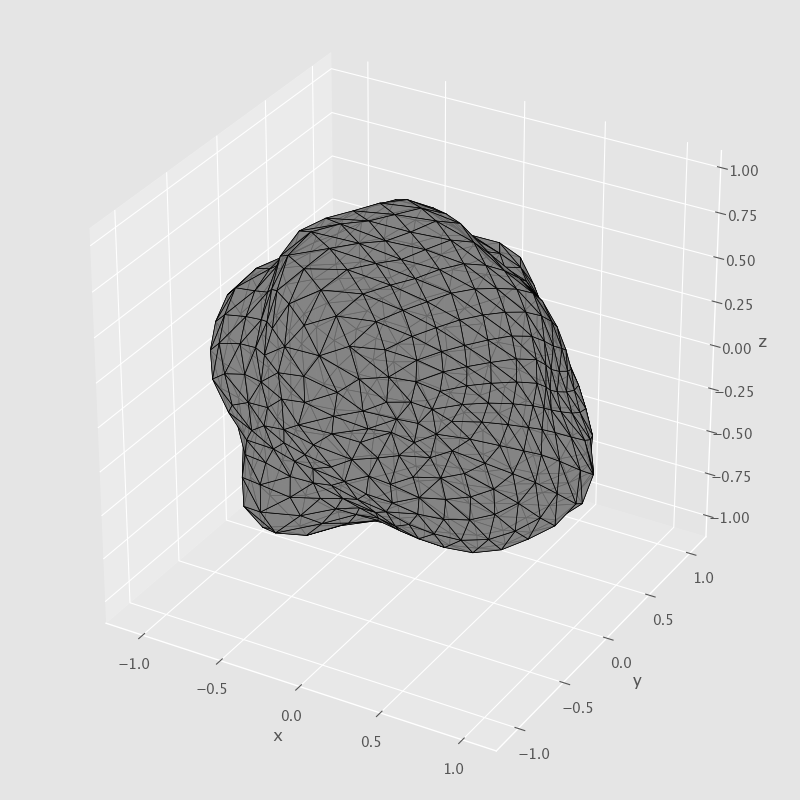

In [7]:
fig1 = plot_mesh(P, T, C, N)

<IPython.core.display.Javascript object>


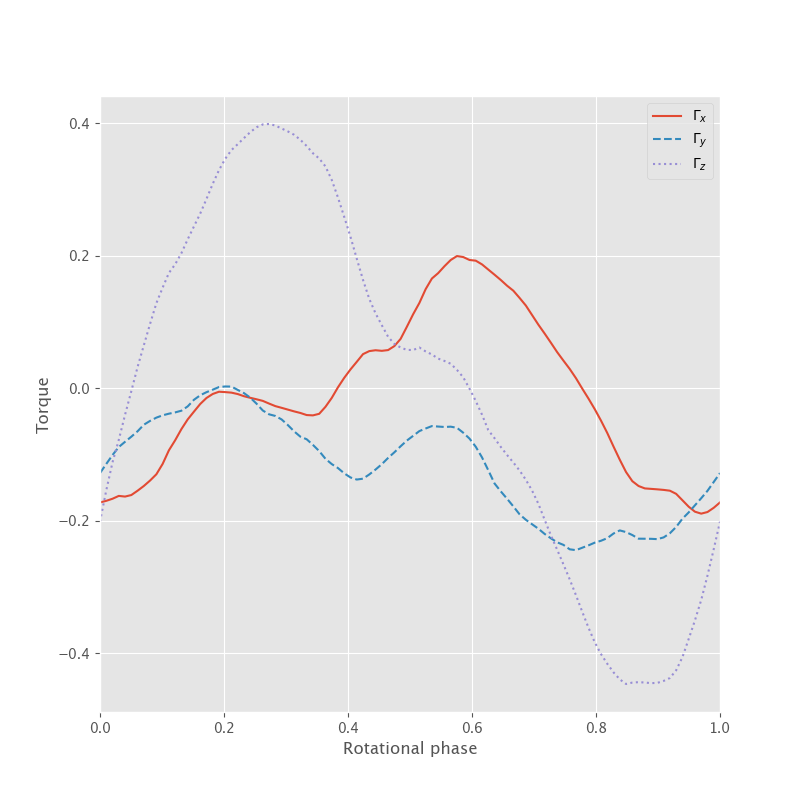

In [8]:
fig = plt.figure(figsize=(8,8))

plt.plot(φ/(2*π),Γ[:,0],label=r'$Γ_x$')
plt.plot(φ/(2*π),Γ[:,1],'--',label=r'$Γ_y$')
plt.plot(φ/(2*π),Γ[:,2],':',label=r'$Γ_z$')
plt.xlabel('Rotational phase')
plt.ylabel('Torque')
plt.legend()
plt.xlim([0,1])
plt.show()

<IPython.core.display.Javascript object>


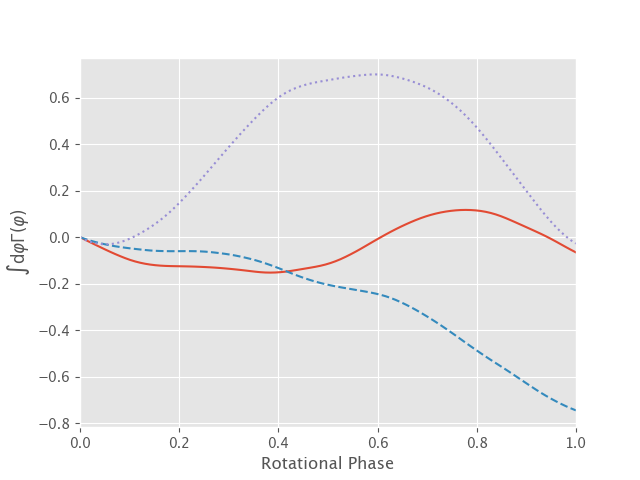

In [9]:
from scipy import integrate

fig = plt.figure()
Γx_int = integrate.cumtrapz(Γ[:,0], φ, initial=0)
Γy_int = integrate.cumtrapz(Γ[:,1], φ, initial=0)
Γz_int = integrate.cumtrapz(Γ[:,2], φ, initial=0)
plt.plot(φ/(2*π), Γx_int, '-')
plt.plot(φ/(2*π), Γy_int, '--')
plt.plot(φ/(2*π), Γz_int, ':')
plt.xlim([0,1])
plt.xlabel('Rotational Phase')
plt.ylabel(r'$\int\mathrm{d}φ \Gamma(φ)$')

plt.show()

<IPython.core.display.Javascript object>


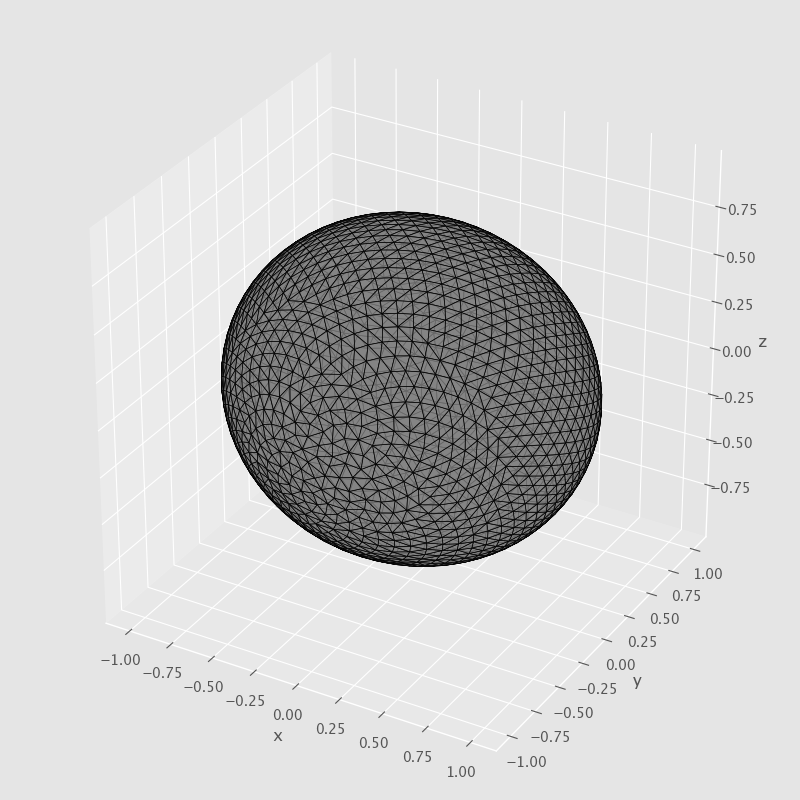

In [10]:
a = 1
b = 0.86
c = 0.82
n = 2000

Ps, Ts, Ns, Cs = ellipsoid_points(a, b, c, n)
fig = plot_mesh(Ps, Ts, Cs, Ns)

In [11]:
λ = 0
β = 0
φS = np.linspace(0, 2*π, 100)

ΓS = np.zeros([φ.size, 3])

for i, fi in enumerate(φS):
    ΓS[i,:] = Γ_LS(Ps, Ts, Cs, Ns, φ = fi, β = β, λ = λ)
    if np.mod(i,φ.size/10)==0: print((i+1),'/',φ.size)

1 / 100
11 / 100
21 / 100
31 / 100
41 / 100
51 / 100
61 / 100
71 / 100
81 / 100
91 / 100


<IPython.core.display.Javascript object>


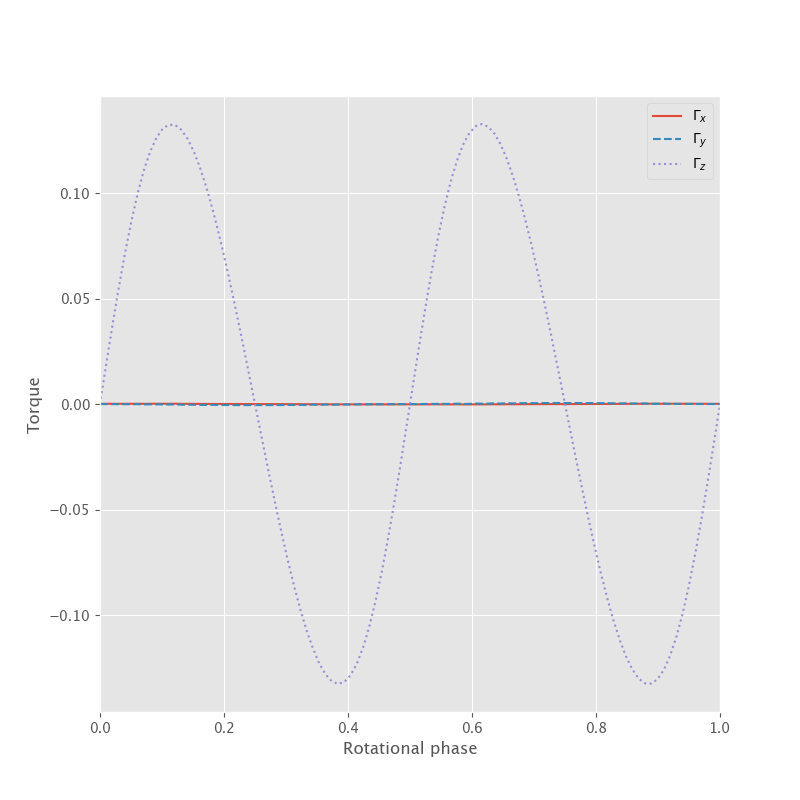

In [12]:
fig = plt.figure(figsize=(8,8))

plt.plot(φS/(2*π),ΓS[:,0],label=r'$Γ_x$')
plt.plot(φS/(2*π),ΓS[:,1],'--',label=r'$Γ_y$')
plt.plot(φS/(2*π),ΓS[:,2],':',label=r'$Γ_z$')
plt.xlabel('Rotational phase')
plt.ylabel('Torque')
plt.legend()
plt.xlim([0,1])
plt.show()

<IPython.core.display.Javascript object>


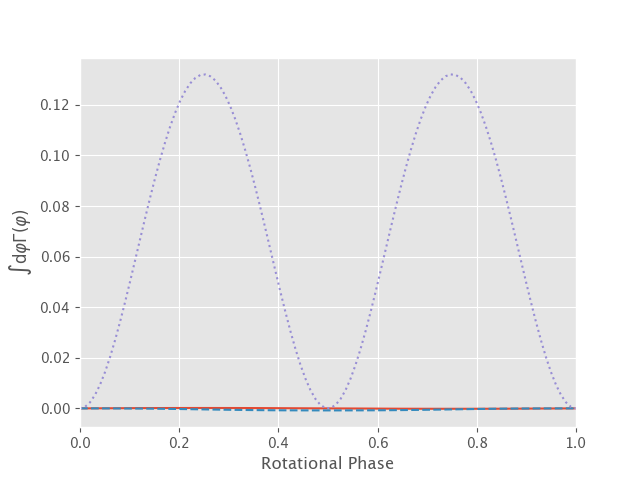

In [13]:
from scipy import integrate

fig = plt.figure()
Γx_int = integrate.cumtrapz(ΓS[:,0], φ, initial=0)
Γy_int = integrate.cumtrapz(ΓS[:,1], φ, initial=0)
Γz_int = integrate.cumtrapz(ΓS[:,2], φ, initial=0)
plt.plot(φ/(2*π), Γx_int, '-')
plt.plot(φ/(2*π), Γy_int, '--')
plt.plot(φ/(2*π), Γz_int, ':')
plt.xlim([0,1])
plt.xlabel('Rotational Phase')
plt.ylabel(r'$\int\mathrm{d}φ \Gamma(φ)$')

plt.show()